In [1]:
import  numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from  sklearn.linear_model import  SGDRegressor #Stochastic Gradient Descent Regressor
from  sklearn.preprocessing import  PolynomialFeatures
import outilsReg as reg
from numpy import random as rd

Using TensorFlow backend.


In [2]:
    #matplotlib inline 
    #df = pd.DataFrame(erreurGeneralisation[0], columns=['Dist', 'RL', 'TREE', 'BG', 'MLP', 'ST'])
    #df.boxplot()

In [3]:
base=pd.read_csv("./complet_data.csv", header=0, decimal=".", index_col=0)

In [4]:
base.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,14.0,114.85,138.0,1132.08,16.0,131.26,2.000000,16.41000,41.020000,1394.590000
2,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.000000,4.25000,127.560000,1955.950000
3,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.000000,60.87000,218.590000,6167.510000
4,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,225.0,1301.78,716.0,4142.56,47.0,271.93,1.318981,41.68308,306.640000,6135.400582
5,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.000000,40.05000,829.026006,9988.790000
6,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,...,2094.0,1386.46,7690.0,5091.64,454.0,300.60,134.000000,88.72000,442.950000,6867.420000
7,28700,2.60,1.60,96.57,1.47,1.10,11.17,27.41,12.76,14.42,...,110.0,372.09,288.0,974.19,144.0,487.10,17.000000,57.50000,226.630000,1890.880000
8,59459,2.45,14.20,84.87,0.40,0.63,15.31,27.93,14.78,14.60,...,608.0,997.60,2250.0,3691.79,125.0,205.10,9.000000,14.77000,439.730000,4909.260000
9,74111,2.46,0.35,97.11,1.25,0.73,16.64,35.16,20.33,8.58,...,425.0,532.66,3149.0,3946.71,206.0,258.18,8.000000,10.03000,115.310000,4747.580000
10,103590,2.62,23.14,67.60,0.92,16.35,19.88,34.55,21.62,13.12,...,2397.0,2221.81,6121.0,5673.63,1070.0,991.80,18.000000,16.68000,1544.240000,8903.930000


In [5]:
boolViolence = (base.columns == 'ViolentCrimesPerPop')
boolPred = (base.columns != 'ViolentCrimesPerPop')

In [6]:
boolViolence

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [7]:
yVar = base.loc[:, boolViolence].values

In [8]:
yVar

array([[ 41.02],
       [127.56],
       [218.59],
       ...,
       [353.83],
       [691.17],
       [918.89]])

In [9]:
XVar = base.loc[:, boolPred].values

In [10]:
XVar.shape

(2215, 141)

In [11]:
echanTrain = rd.choice([0,1],size=XVar.shape[0], replace=True, p= [0.3, 0.7])

In [12]:
#theta = rd.randn(1+XVar.shape[1])

### Phase d'entrainement


In [13]:
modele = reg.modelisation(yVar[echanTrain==1,:], XVar[echanTrain==1,:])

In [14]:
yVar[echanTrain==1,:]

array([[ 41.02],
       [218.59],
       [306.64],
       ...,
       [ 46.85],
       [353.83],
       [691.17]])

In [15]:
modele.fit(10)

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1529/1529 [==============================] - 0s 55us/step - loss: 2177283781875.1079
Epoch 2/20
1529/1529 [==============================] - 0s 8us/step - loss: 1480104055167.0791
Epoch 3/20
1529/1529 [==============================] - 0s 8us/step - loss: 935077657734.6135
Epoch 4/20
1529/1529 [==============================] - 0s 8us/step - loss: 607921765242.7260
Epoch 5/20
1529/1529 [==============================] - 0s 8us/step - loss: 336506753064.1831
Epoch 6/20
1529/1529 [==============================] - 0s 8us/step - loss: 182132047641.6167
Epoch 7/20
1529/1529 [==============================] - 0s 8us/step - loss: 70204653092.4997
Epoch 8/20
1529/1529 [==============================] - 0s 8us/step - loss: 22876816158.3048
Epoch 9/20
1529/1529 [==============================] - 0s 8us/step - loss: 8549902397.2793
Epoch 10/20
1529/1529 [==============================] - 0s 8us/step - loss: 2068577863.9529
Epoch 11/20
1529/1529 [==============================] - 0s 8u

(array([575.93431228, 624.49380861]),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False),
 <keras.callbacks.callbacks.History at 0x7fd73ecadfd0>)

In [16]:
modele.predict(XVar[echanTrain==0,:])

(array([ 1.14275602e+03,  1.35089545e+03,  2.20849027e+02,  1.74959711e+02,
        -2.83325977e+02,  6.24333887e+02,  6.87362976e+02,  4.75917728e+02,
         3.83093963e+02,  6.76585692e+02,  8.94252212e+02, -4.08447146e+02,
         1.36591197e+03, -4.78037412e+01,  1.23926162e+03,  5.46575997e+02,
         3.15127344e+02,  6.74742817e+02,  4.57301579e+02,  8.28243455e+02,
         7.51202670e+02,  5.17746678e+02,  1.41387176e+03, -2.97074092e+02,
        -3.92456942e+02,  1.33449130e+02,  1.42432003e+02,  2.01687733e+02,
         6.89385796e+02,  1.42169737e+03,  1.67006867e+02,  3.06523060e+02,
         1.09697439e+03,  7.91732750e+02,  8.29607351e+02, -5.21219202e+02,
         8.86314102e+02,  3.24696221e+01,  6.50106929e+02,  6.89716850e+01,
         2.26106866e+02,  2.94132382e+02,  5.80503662e+02,  9.13671879e+02,
         1.06591398e+03, -3.08137827e+02,  6.53232292e+02,  2.23391054e+03,
         1.03018028e+03,  9.44588761e+02,  5.89504385e+01, -9.71827294e+00,
         8.3

In [17]:
modele.evaluation(XVar[echanTrain==0,:], yVar[echanTrain==0,:])

(758242.2255538175,
 19813.218811825853,
 669882.5524387427,
 645454.4210582956,
 269823874.36855066,
 10904639.317003425)

In [18]:
modele.cross_val(10, 10)

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1391/1391 [==============================] - 0s 56us/step - loss: 78821539163438.5625
Epoch 2/20
1391/1391 [==============================] - 0s 8us/step - loss: 65425983347281.3438
Epoch 3/20
1391/1391 [==============================] - 0s 8us/step - loss: 61240880238712.7266
Epoch 4/20
1391/1391 [==============================] - 0s 8us/step - loss: 50148423407620.4219
Epoch 5/20
1391/1391 [==============================] - 0s 8us/step - loss: 44528023471469.8672
Epoch 6/20
1391/1391 [==============================] - 0s 8us/step - loss: 38430516517551.5781
Epoch 7/20
1391/1391 [==============================] - 0s 8us/step - loss: 35548582256457.4297
Epoch 8/20
1391/1391 [==============================] - 0s 8us/step - loss: 28611221574518.3359
Epoch 9/20
1391/1391 [==============================] - 0s 8us/step - loss: 25806228252196.4414
Epoch 10/20
1391/1391 [==============================] - 0s 9us/step - loss: 21233351656743.1992
Epoch 11/20
1391/1391 [===============

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1363/1363 [==============================] - 0s 57us/step - loss: 41955011128679.8672
Epoch 2/20
1363/1363 [==============================] - 0s 9us/step - loss: 29668243383191.5703
Epoch 3/20
1363/1363 [==============================] - 0s 9us/step - loss: 18180339799401.3672
Epoch 4/20
1363/1363 [==============================] - 0s 9us/step - loss: 11065767077745.2559
Epoch 5/20
1363/1363 [==============================] - 0s 8us/step - loss: 5711929091905.1738
Epoch 6/20
1363/1363 [==============================] - 0s 8us/step - loss: 3353030032428.3257
Epoch 7/20
1363/1363 [==============================] - 0s 9us/step - loss: 906785239932.5253
Epoch 8/20
1363/1363 [==============================] - 0s 9us/step - loss: 327390568744.7571
Epoch 9/20
1363/1363 [==============================] - 0s 9us/step - loss: 75672457145.0037
Epoch 10/20
1363/1363 [==============================] - 0s 9us/step - loss: 11695074137.2150
Epoch 11/20
1363/1363 [===========================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1380/1380 [==============================] - 0s 57us/step - loss: 30707286625769.7383
Epoch 2/20
1380/1380 [==============================] - 0s 8us/step - loss: 18625441087725.4492
Epoch 3/20
1380/1380 [==============================] - 0s 8us/step - loss: 10643445707998.6094
Epoch 4/20
1380/1380 [==============================] - 0s 8us/step - loss: 5810234925412.1748
Epoch 5/20
1380/1380 [==============================] - 0s 8us/step - loss: 2598203722054.4927
Epoch 6/20
1380/1380 [==============================] - 0s 8us/step - loss: 1100783968196.6377
Epoch 7/20
1380/1380 [==============================] - 0s 8us/step - loss: 217984783597.4493
Epoch 8/20
1380/1380 [==============================] - 0s 8us/step - loss: 25051207561.2754
Epoch 9/20
1380/1380 [==============================] - 0s 8us/step - loss: 41395837373.2174
Epoch 10/20
1380/1380 [==============================] - 0s 8us/step - loss: 62357471172.6377
Epoch 11/20
1380/1380 [=============================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1381/1381 [==============================] - 0s 61us/step - loss: 233031785113.8595
Epoch 2/20
1381/1381 [==============================] - 0s 9us/step - loss: 76811930280.6894
Epoch 3/20
1381/1381 [==============================] - 0s 9us/step - loss: 38406280155.4815
Epoch 4/20
1381/1381 [==============================] - 0s 9us/step - loss: 24767574177.6452
Epoch 5/20
1381/1381 [==============================] - 0s 9us/step - loss: 13519642526.8646
Epoch 6/20
1381/1381 [==============================] - 0s 9us/step - loss: 2260707162.2766
Epoch 7/20
1381/1381 [==============================] - 0s 8us/step - loss: 8903060493.9957
Epoch 8/20
1381/1381 [==============================] - 0s 8us/step - loss: 1831921527.6582
Epoch 9/20
1381/1381 [==============================] - 0s 8us/step - loss: 3819530824.2491
Epoch 10/20
1381/1381 [==============================] - 0s 8us/step - loss: 850005404.2230
Epoch 11/20
1381/1381 [==============================] - 0s 8us/step - lo

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1383/1383 [==============================] - 0s 56us/step - loss: 9001787107062.9297
Epoch 2/20
1383/1383 [==============================] - 0s 8us/step - loss: 6234797017717.3564
Epoch 3/20
1383/1383 [==============================] - 0s 8us/step - loss: 3660516438711.9941
Epoch 4/20
1383/1383 [==============================] - 0s 9us/step - loss: 1953501062997.7036
Epoch 5/20
1383/1383 [==============================] - 0s 8us/step - loss: 1162495839607.3926
Epoch 6/20
1383/1383 [==============================] - 0s 8us/step - loss: 719115298645.7035
Epoch 7/20
1383/1383 [==============================] - 0s 8us/step - loss: 451374403409.2610
Epoch 8/20
1383/1383 [==============================] - 0s 8us/step - loss: 289213438679.0919
Epoch 9/20
1383/1383 [==============================] - 0s 8us/step - loss: 171350326928.7520
Epoch 10/20
1383/1383 [==============================] - 0s 8us/step - loss: 101022788260.7433
Epoch 11/20
1383/1383 [==============================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1380/1380 [==============================] - 0s 56us/step - loss: 1045884944621.4493
Epoch 2/20
1380/1380 [==============================] - 0s 8us/step - loss: 574803336859.8262
Epoch 3/20
1380/1380 [==============================] - 0s 8us/step - loss: 276332295865.5073
Epoch 4/20
1380/1380 [==============================] - 0s 8us/step - loss: 112089548414.1449
Epoch 5/20
1380/1380 [==============================] - 0s 8us/step - loss: 26626674227.9420
Epoch 6/20
1380/1380 [==============================] - 0s 8us/step - loss: 3001860952.1159
Epoch 7/20
1380/1380 [==============================] - 0s 8us/step - loss: 1412921935.7681
Epoch 8/20
1380/1380 [==============================] - 0s 8us/step - loss: 3240326759.8841
Epoch 9/20
1380/1380 [==============================] - 0s 8us/step - loss: 3850910727.4203
Epoch 10/20
1380/1380 [==============================] - 0s 8us/step - loss: 7661263434.2029
Epoch 11/20
1380/1380 [==============================] - 0s 8us/step

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1351/1351 [==============================] - 0s 63us/step - loss: 25213881476036.1211
Epoch 2/20
1351/1351 [==============================] - 0s 10us/step - loss: 15724313091107.6250
Epoch 3/20
1351/1351 [==============================] - 0s 9us/step - loss: 10467611066331.6172
Epoch 4/20
1351/1351 [==============================] - 0s 9us/step - loss: 5397309397518.0215
Epoch 5/20
1351/1351 [==============================] - 0s 9us/step - loss: 2774332910266.8364
Epoch 6/20
1351/1351 [==============================] - 0s 10us/step - loss: 1417875671938.9370
Epoch 7/20
1351/1351 [==============================] - 0s 9us/step - loss: 818030714255.4434
Epoch 8/20
1351/1351 [==============================] - 0s 10us/step - loss: 508560497372.1865
Epoch 9/20
1351/1351 [==============================] - 0s 9us/step - loss: 382660579282.5226
Epoch 10/20
1351/1351 [==============================] - 0s 10us/step - loss: 276118011006.5788
Epoch 11/20
1351/1351 [======================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1380/1380 [==============================] - 0s 56us/step - loss: 7960605179666.5518
Epoch 2/20
1380/1380 [==============================] - 0s 8us/step - loss: 4356564926226.5508
Epoch 3/20
1380/1380 [==============================] - 0s 9us/step - loss: 1741771812448.4639
Epoch 4/20
1380/1380 [==============================] - 0s 8us/step - loss: 589697163620.1738
Epoch 5/20
1380/1380 [==============================] - 0s 8us/step - loss: 88465905901.4493
Epoch 6/20
1380/1380 [==============================] - 0s 8us/step - loss: 22534810995.0145
Epoch 7/20
1380/1380 [==============================] - 0s 8us/step - loss: 28108004522.6667
Epoch 8/20
1380/1380 [==============================] - 0s 8us/step - loss: 28312989117.2174
Epoch 9/20
1380/1380 [==============================] - 0s 8us/step - loss: 18186169967.3043
Epoch 10/20
1380/1380 [==============================] - 0s 8us/step - loss: 10989175184.6957
Epoch 11/20
1380/1380 [==============================] - 0s 8

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1371/1371 [==============================] - 0s 56us/step - loss: 24837139517060.5742
Epoch 2/20
1371/1371 [==============================] - 0s 9us/step - loss: 17433938757400.4609
Epoch 3/20
1371/1371 [==============================] - 0s 8us/step - loss: 13629716835249.5742
Epoch 4/20
1371/1371 [==============================] - 0s 8us/step - loss: 8568294348989.7119
Epoch 5/20
1371/1371 [==============================] - 0s 8us/step - loss: 6493116595399.4229
Epoch 6/20
1371/1371 [==============================] - 0s 8us/step - loss: 3116760112632.1577
Epoch 7/20
1371/1371 [==============================] - 0s 9us/step - loss: 1942801944112.9219
Epoch 8/20
1371/1371 [==============================] - 0s 8us/step - loss: 1064939999713.0035
Epoch 9/20
1371/1371 [==============================] - 0s 8us/step - loss: 794614229041.2954
Epoch 10/20
1371/1371 [==============================] - 0s 9us/step - loss: 290414772111.9650
Epoch 11/20
1371/1371 [========================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1381/1381 [==============================] - 0s 58us/step - loss: 5943879478254.9463
Epoch 2/20
1381/1381 [==============================] - 0s 8us/step - loss: 3906539052634.8330
Epoch 3/20
1381/1381 [==============================] - 0s 8us/step - loss: 2334527056795.8984
Epoch 4/20
1381/1381 [==============================] - 0s 8us/step - loss: 1308744756966.2332
Epoch 5/20
1381/1381 [==============================] - 0s 8us/step - loss: 809281061457.1934
Epoch 6/20
1381/1381 [==============================] - 0s 8us/step - loss: 470055768203.4005
Epoch 7/20
1381/1381 [==============================] - 0s 8us/step - loss: 264843554190.1810
Epoch 8/20
1381/1381 [==============================] - 0s 8us/step - loss: 140644665870.4591
Epoch 9/20
1381/1381 [==============================] - 0s 8us/step - loss: 65940828782.8530
Epoch 10/20
1381/1381 [==============================] - 0s 8us/step - loss: 29277672496.1970
Epoch 11/20
1381/1381 [==============================] -

(array([[7.75244596e+05, 1.97120426e+04, 8.49571387e+05, 8.09848371e+05,
         5.38813345e+11, 2.15261504e+10],
        [7.68522255e+05, 7.79322460e+03, 7.56329362e+05, 7.93979544e+05,
         3.00997709e+09, 1.21828487e+08],
        [8.21756321e+05, 1.28804264e+04, 1.03327374e+06, 8.80760696e+05,
         7.50430646e+09, 3.00377954e+08],
        [8.86064155e+05, 1.80244524e+04, 9.44092457e+05, 8.91539825e+05,
         7.37872492e+09, 3.01404526e+08],
        [7.84615173e+05, 6.95434196e+03, 6.06836745e+05, 6.07461876e+05,
         3.38138553e+09, 1.36369842e+08],
        [7.30960922e+05, 3.57423853e+04, 6.07974100e+05, 6.44490018e+05,
         4.27463844e+08, 1.92339706e+07],
        [8.43935015e+05, 8.66661897e+04, 8.58395682e+05, 8.47534767e+05,
         5.43192409e+09, 2.19719051e+08],
        [7.95393718e+05, 1.20502781e+04, 5.74330597e+05, 5.74185632e+05,
         1.76721277e+09, 6.94693129e+07],
        [8.01287579e+05, 8.10077128e+03, 7.32207773e+05, 7.10211409e+05,
       

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1382/1382 [==============================] - 0s 57us/step - loss: 1763192852971.9941
Epoch 2/20
1382/1382 [==============================] - 0s 8us/step - loss: 432027016229.0478
Epoch 3/20
1382/1382 [==============================] - 0s 8us/step - loss: 23489437650.0608
Epoch 4/20
1382/1382 [==============================] - 0s 8us/step - loss: 205061658551.3864
Epoch 5/20
1382/1382 [==============================] - 0s 8us/step - loss: 138434410407.0854
Epoch 6/20
1382/1382 [==============================] - 0s 8us/step - loss: 17400180043.7627
Epoch 7/20
1382/1382 [==============================] - 0s 8us/step - loss: 18455565020.8046
Epoch 8/20
1382/1382 [==============================] - 0s 8us/step - loss: 21216792252.2026
Epoch 9/20
1382/1382 [==============================] - 0s 8us/step - loss: 2249626002.6165
Epoch 10/20
1382/1382 [==============================] - 0s 8us/step - loss: 1773901247.2590
Epoch 11/20
1382/1382 [==============================] - 0s 8us/s

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1388/1388 [==============================] - 0s 56us/step - loss: 22228067779976.4844
Epoch 2/20
1388/1388 [==============================] - 0s 9us/step - loss: 14845213099730.9980
Epoch 3/20
1388/1388 [==============================] - 0s 8us/step - loss: 8489311854143.4463
Epoch 4/20
1388/1388 [==============================] - 0s 8us/step - loss: 4899382839703.2393
Epoch 5/20
1388/1388 [==============================] - 0s 9us/step - loss: 2548089694644.7495
Epoch 6/20
1388/1388 [==============================] - 0s 8us/step - loss: 1121265004909.9250
Epoch 7/20
1388/1388 [==============================] - 0s 9us/step - loss: 478956354861.0029
Epoch 8/20
1388/1388 [==============================] - 0s 9us/step - loss: 64086464742.1787
Epoch 9/20
1388/1388 [==============================] - 0s 9us/step - loss: 18813329655.8847
Epoch 10/20
1388/1388 [==============================] - 0s 9us/step - loss: 20653276753.1527
Epoch 11/20
1388/1388 [==============================

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1379/1379 [==============================] - 0s 56us/step - loss: 3413008742475.7422
Epoch 2/20
1379/1379 [==============================] - 0s 9us/step - loss: 1396173875866.8252
Epoch 3/20
1379/1379 [==============================] - 0s 8us/step - loss: 596733716778.5120
Epoch 4/20
1379/1379 [==============================] - 0s 8us/step - loss: 323384360104.5627
Epoch 5/20
1379/1379 [==============================] - 0s 9us/step - loss: 144036432758.6251
Epoch 6/20
1379/1379 [==============================] - 0s 8us/step - loss: 37135279640.8760
Epoch 7/20
1379/1379 [==============================] - 0s 8us/step - loss: 6696856823.8318
Epoch 8/20
1379/1379 [==============================] - 0s 8us/step - loss: 4861374585.0384
Epoch 9/20
1379/1379 [==============================] - 0s 9us/step - loss: 4214927862.7179
Epoch 10/20
1379/1379 [==============================] - 0s 8us/step - loss: 4060546109.2618
Epoch 11/20
1379/1379 [==============================] - 0s 8us/s

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1376/1376 [==============================] - 0s 57us/step - loss: 3409573232640.0000
Epoch 2/20
1376/1376 [==============================] - 0s 8us/step - loss: 2288369129519.6279
Epoch 3/20
1376/1376 [==============================] - 0s 9us/step - loss: 1508636616132.4651
Epoch 4/20
1376/1376 [==============================] - 0s 8us/step - loss: 813148465830.6976
Epoch 5/20
1376/1376 [==============================] - 0s 9us/step - loss: 545455174944.7442
Epoch 6/20
1376/1376 [==============================] - 0s 9us/step - loss: 289738152001.4883
Epoch 7/20
1376/1376 [==============================] - 0s 8us/step - loss: 105854156936.9302
Epoch 8/20
1376/1376 [==============================] - 0s 9us/step - loss: 60288064026.7907
Epoch 9/20
1376/1376 [==============================] - 0s 8us/step - loss: 13669783201.8605
Epoch 10/20
1376/1376 [==============================] - 0s 9us/step - loss: 2414889603.3488
Epoch 11/20
1376/1376 [==============================] - 0s

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1383/1383 [==============================] - 0s 57us/step - loss: 1235437961227.8467
Epoch 2/20
1383/1383 [==============================] - 0s 9us/step - loss: 566618034297.4288
Epoch 3/20
1383/1383 [==============================] - 0s 9us/step - loss: 286595314294.8373
Epoch 4/20
1383/1383 [==============================] - 0s 10us/step - loss: 83610381358.6464
Epoch 5/20
1383/1383 [==============================] - 0s 9us/step - loss: 41169177566.6811
Epoch 6/20
1383/1383 [==============================] - 0s 9us/step - loss: 10788806837.5879
Epoch 7/20
1383/1383 [==============================] - 0s 9us/step - loss: 14040961548.9573
Epoch 8/20
1383/1383 [==============================] - 0s 9us/step - loss: 12375702016.1851
Epoch 9/20
1383/1383 [==============================] - 0s 10us/step - loss: 4536931415.5546
Epoch 10/20
1383/1383 [==============================] - 0s 10us/step - loss: 4825174226.5568
Epoch 11/20
1383/1383 [==============================] - 0s 9us

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1375/1375 [==============================] - 0s 56us/step - loss: 9773522358942.2539
Epoch 2/20
1375/1375 [==============================] - 0s 8us/step - loss: 6015188434348.2178
Epoch 3/20
1375/1375 [==============================] - 0s 8us/step - loss: 3000557584086.1089
Epoch 4/20
1375/1375 [==============================] - 0s 8us/step - loss: 1347212597210.7637
Epoch 5/20
1375/1375 [==============================] - 0s 8us/step - loss: 406634356442.7636
Epoch 6/20
1375/1375 [==============================] - 0s 8us/step - loss: 170431639998.8364
Epoch 7/20
1375/1375 [==============================] - 0s 8us/step - loss: 13172043180.2182
Epoch 8/20
1375/1375 [==============================] - 0s 8us/step - loss: 13739093010.6182
Epoch 9/20
1375/1375 [==============================] - 0s 8us/step - loss: 19069439832.4364
Epoch 10/20
1375/1375 [==============================] - 0s 8us/step - loss: 19034944605.0909
Epoch 11/20
1375/1375 [==============================] - 0

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1366/1366 [==============================] - 0s 59us/step - loss: 6108035663623.1211
Epoch 2/20
1366/1366 [==============================] - 0s 9us/step - loss: 3414771834868.0059
Epoch 3/20
1366/1366 [==============================] - 0s 8us/step - loss: 1803806460086.9106
Epoch 4/20
1366/1366 [==============================] - 0s 9us/step - loss: 714297396678.2782
Epoch 5/20
1366/1366 [==============================] - 0s 8us/step - loss: 174466518074.4714
Epoch 6/20
1366/1366 [==============================] - 0s 9us/step - loss: 71798354960.4919
Epoch 7/20
1366/1366 [==============================] - 0s 8us/step - loss: 7037277343.6720
Epoch 8/20
1366/1366 [==============================] - 0s 8us/step - loss: 7845690246.5593
Epoch 9/20
1366/1366 [==============================] - 0s 9us/step - loss: 10892455809.3119
Epoch 10/20
1366/1366 [==============================] - 0s 9us/step - loss: 9896301763.6545
Epoch 11/20
1366/1366 [==============================] - 0s 9us

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1372/1372 [==============================] - 0s 57us/step - loss: 7420577598114.7061
Epoch 2/20
1372/1372 [==============================] - 0s 9us/step - loss: 2508489878728.0234
Epoch 3/20
1372/1372 [==============================] - 0s 8us/step - loss: 864191993124.5714
Epoch 4/20
1372/1372 [==============================] - 0s 8us/step - loss: 16254546692.8513
Epoch 5/20
1372/1372 [==============================] - 0s 8us/step - loss: 169197675985.7260
Epoch 6/20
1372/1372 [==============================] - 0s 8us/step - loss: 138452174441.9825
Epoch 7/20
1372/1372 [==============================] - 0s 9us/step - loss: 89713531254.6705
Epoch 8/20
1372/1372 [==============================] - 0s 8us/step - loss: 4356411811.8251
Epoch 9/20
1372/1372 [==============================] - 0s 8us/step - loss: 13503092561.7259
Epoch 10/20
1372/1372 [==============================] - 0s 9us/step - loss: 10660920623.0204
Epoch 11/20
1372/1372 [==============================] - 0s 9u

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1366/1366 [==============================] - 0s 57us/step - loss: 8957718238173.5176
Epoch 2/20
1366/1366 [==============================] - 0s 9us/step - loss: 3877451689618.1787
Epoch 3/20
1366/1366 [==============================] - 0s 8us/step - loss: 1409155345640.3865
Epoch 4/20
1366/1366 [==============================] - 0s 8us/step - loss: 70593473453.5403
Epoch 5/20
1366/1366 [==============================] - 0s 8us/step - loss: 153785995836.7203
Epoch 6/20
1366/1366 [==============================] - 0s 8us/step - loss: 236683254011.8770
Epoch 7/20
1366/1366 [==============================] - 0s 8us/step - loss: 123908532376.9253
Epoch 8/20
1366/1366 [==============================] - 0s 8us/step - loss: 24993350507.5725
Epoch 9/20
1366/1366 [==============================] - 0s 9us/step - loss: 4467910059.2914
Epoch 10/20
1366/1366 [==============================] - 0s 8us/step - loss: 12722180209.9444
Epoch 11/20
1366/1366 [==============================] - 0s 

/home/travis/virtualenv/python3.6.6/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Epoch 1/20
1374/1374 [==============================] - 0s 56us/step - loss: 1184937028886.7307
Epoch 2/20
1374/1374 [==============================] - 0s 9us/step - loss: 259441620974.1135
Epoch 3/20
1374/1374 [==============================] - 0s 9us/step - loss: 14033183077.7293
Epoch 4/20
1374/1374 [==============================] - 0s 8us/step - loss: 45842057874.8181
Epoch 5/20
1374/1374 [==============================] - 0s 9us/step - loss: 26899127895.1965
Epoch 6/20
1374/1374 [==============================] - 0s 10us/step - loss: 9879844275.9825
Epoch 7/20
1374/1374 [==============================] - 0s 10us/step - loss: 18981084307.5633
Epoch 8/20
1374/1374 [==============================] - 0s 9us/step - loss: 5152368149.6128
Epoch 9/20
1374/1374 [==============================] - 0s 8us/step - loss: 8573063814.1485
Epoch 10/20
1374/1374 [==============================] - 0s 8us/step - loss: 3712906805.6594
Epoch 11/20
1374/1374 [==============================] - 0s 9us/ste

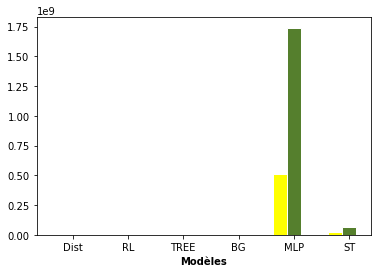

In [19]:
reg.resultat(modele, 10, 10)